## Multi-stage game

* Stage 1: Established firms decide which technologies to research.
* Stage 2: If a new technology has not been invented, a new entrent can invent it instead. The new entrent decides whether it wants to cooperate with established firms or enter the market as a new firm.
* Stage 3a: Established firms and new entrent cooperate. Establish firm decides whether to produce the new technology or the old technology (based on cost of production differences).
* Stage 3b: Established firms and new entrents compete. New entrent as the better product. Consumer sales are calculated and subtracted from overall cost.
* Stage 4: All firms decide whether to stay in the product market based on profit margin. New entrents need only break even to remain. Established firms must continue to make a profit.

## Decision Theory Notation

### Stage 1 (Modeled on Acemoglu 2012):
> - There are $n$ firms. Each firm makes one choice between small and big. Each firm starts with a market share which is directly proportional to consumer base and marginal profits.
    - For $z$ firms with $E[U] = 0$, the market size benefit $m_z = n  - z$ 
        - $z_1$ is dependent on *p* at $t =1$; $z_2$ is dependent on *s* at $t = 2$ 
        - $1 \lt m_z \lt 0$ 
    - If a firm picks small, they get $1 + \lambda$ in return at time $t = 1$
        - Expected utility, $E[U_1] = (1 + \lambda) * m_z$
    - If a firm picks big, there is a chance *p* that they will get $1 + 2\lambda$ in return at time $t = 1$ or they return 0.
        - $E[U_1] = [p(1 + 2\lambda)] * m_z$ or 0
        - $1 \lt p \lt 0$
    - If a firm picks small, there is a chance *s* that the firm will remain in the market and return the same expected utility from time $ t = 1$ at time $t = 2$, else they will be forced out and return 0.
        - $E[U_2] = [s(1 + \lambda)] * m_z$ or 0
        - $1 \lt s \lt 0$
    - If a firm picks big, they will return standard expected utility $1 + \lambda$ at time $t = 2$.
        - $E[U_2] = (1 + \lambda) * m_z$
    - It is more likely that a firm will remain in the market at $t = 2$ than a firm will succeed at drawing customers with the big pick at $t = 1$.
        - $s \gt p$

Notes: this model doesn't account for cumulative innovations which was included in Acemoglu dealt with completely new lines of technological innovation and this model addresses changes to the same product line which are modeled in incremental changes.

## Code Map

### Stage 1
Functions for calculating probabilities. Should return True if successful at the stage.
>- probability calculators
    - import random
    - user defined variable - success_threshold_t1
    - user defined variable - success_threshold_t2
    - def success_big():
        - p = random.randint(0, 100)
        - if p > success_threshold_t1
            - return True
    - def stay_small():
        - s = random.randint(0, 100)
        - if s > success_threshold_t2
            - return True

Basic code map includes for single firm:
1. Choose between big or small
    - Global user defined variable - $\lambda$
    - Global variable - firm_choice
    - If small, calculate expected utility
        - $1 + \lambda$
    - If big, calculate probability of success
        - if success_big() == True
            - calculate expected utility
            - $1 + 2 * \lambda$
        - else
            - set expected utility = 0
2. Assign total_profit variable as expected utility
3. Output total_profit at time 1
4. Calculate time 2 profit gains based on firm_choice
    - If firm_choice == "small", calculate probability of staying
        - if stay_small() == True
            - calculate expected utility
            - $1 + \lambda$
        - else
            - set expected utility = 0
    - If firm_choice == "big", calculate expected utility
        - $1 + \lambda$
5. Update total_profit variable by adding new expected utility
6. Output total_profit at time 2


$U(success | b) = 1 + \lambda$

$U(\neg success | b) = 0$

$E(U | b) = \sum_{x \in X} U(x | b) p(x)$

$E[U] = \sum_{x \in X} U[x] p(x)$                                                         

In [24]:
import seaborn as sns
import pandas as pd
import random
import matplotlib.pyplot as plt

In [25]:
#create global variables
firm_choice = "big"
success_threshold_t1 = 99
success_threshold_t2 = 75
value_lambda = 1
gain_multiplier = 2

In [26]:
#single firm choice game for basic code outline

#calculate whether a big action succeeds 
#using a threshold value which is user assigned and a randomly generated number
def success_big(success_threshold_t1):
    p = random.randint(0, 100)
    return p < success_threshold_t1
    
#calculate whether a small action will stay in the market at time 2
#using a threshold value which is user assigned and a randomly generated number 
def stay_small(success_threshold_t2):
    s = random.randint(0, 100)
    return s < success_threshold_t2

#calculate utility at time 1 

def utility_t1(firm_choice, gain_multiplier, value_lambda, success_threshold_t1):
    if firm_choice == "small":
        utility = 1 + value_lambda
    else:
        if success_big(success_threshold_t1):
            utility = 1 + (gain_multiplier * value_lambda)
        else:
            utility = 0
    return utility

#calculate utility at time 2
def utility_t2(firm_choice, value_lambda, success_threshold_t2):
    utility = 1 + value_lambda
    if firm_choice == "small":
        if stay_small(success_threshold_t2) == False:
            utility = 0
    return utility
        
def total_utility(firm_choice, gain_multiplier, value_lambda, success_threshold_t1, success_threshold_t2):
    #run through the steps of the process
    total_profit = 0
    
    profit_t1 = utility_t1(firm_choice, gain_multiplier, value_lambda, success_threshold_t1)
    total_profit += profit_t1
    #output_t1 = "Total profit at time 1 is {}."
    #print(output_t1.format(total_profit))
    
    profit_t2 = utility_t2(firm_choice, value_lambda, success_threshold_t2)
    total_profit += profit_t2
    #output_t2 = "Total profit at time 2 is {}."
    #print(output_t2.format(total_profit))
    
    return total_profit


In [12]:
def expected_total_utility(firm_choice, gain_multiplier, value_lambda, success_threshold_t1, success_threshold_t2):
    
    #numerically estimated the expected total utility using Monte Carlo methods
    sum_utility = 0
    n = 1000
    
    for i in range(n):
        sum_utility += total_utility(firm_choice, gain_multiplier, value_lambda, success_threshold_t1, success_threshold_t2)
        
    return float(sum_utility) / n

In [13]:
def delta_expected_total_utility(gain_multiplier, value_lambda, success_threshold_t1, success_threshold_t2):
    
    #numerically estimate the expected total utility using Monte Carlo methods
    
    big_eu = expected_total_utility("big", gain_multiplier, value_lambda, success_threshold_t1, success_threshold_t2)
    small_eu = expected_total_utility("small", gain_multiplier, value_lambda, success_threshold_t1, success_threshold_t2)
    
    return big_eu - small_eu

In [14]:
data = [delta_expected_total_utility(gain_multiplier, value_lambda, success_threshold_t1, success_threshold_t2)
        for i in range(5000)]

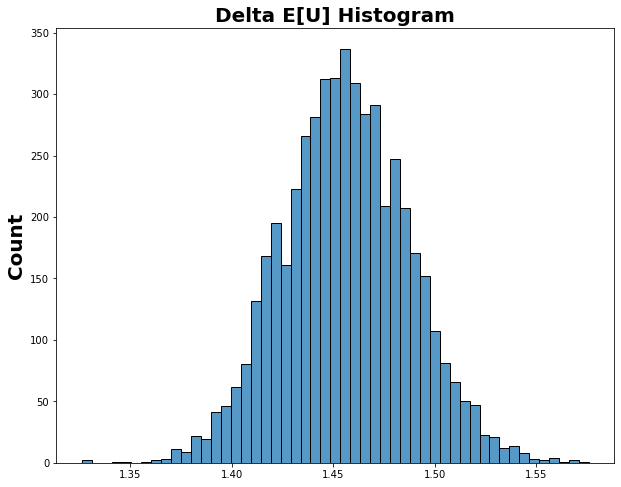

In [27]:
plt.figure(figsize=(10,8))
sns_pp1 = sns.histplot(data)
sns_pp1.set_ylabel("Count", fontdict={'fontsize': 20, 'fontweight': 'bold'})
sns_pp1.set_title("Delta E[U] Histogram", fontdict={'fontsize': 20, 'fontweight': 'bold'})
sns_pp1.figure.savefig("sns-histogram.png")

In [37]:
s = pd.Series(data)
s.describe()

count    5000.000000
mean        1.456048
std         0.031102
min         1.326000
25%         1.435000
50%         1.456000
75%         1.477000
max         1.576000
dtype: float64

In [16]:
records = []

for st1 in range(0,100,5):
    for st2 in range(0,100,5):
        records.append({
            "st1" : st1,
            "st2" : st2,
            "dEU" : delta_expected_total_utility(gain_multiplier, value_lambda, st1, st2)
        })

In [17]:
list(range(0,100,5))

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [28]:
df = pd.DataFrame.from_records(records)
df.head()

,st1,st2,dEU
0,0,0,0.000
1,0,5,-0.090
2,0,10,-0.188
3,0,15,-0.298
4,0,20,-0.366


In [32]:
dfx = df.pivot("st1", "st2", "dEU")
dfx.iloc[0:5, 0:5]

st2,0,5,10,15,20
st1,,,,,
0,0.000,-0.090,-0.188,-0.298,-0.366
5,0.117,-0.007,-0.023,-0.154,-0.231
10,0.288,0.185,0.089,0.015,-0.109
15,0.438,0.398,0.318,0.110,0.051
20,0.543,0.494,0.343,0.286,0.209


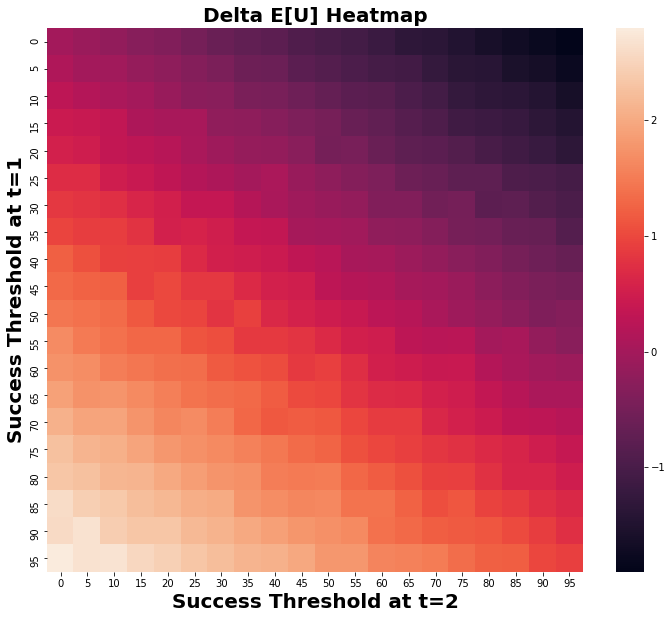

In [33]:
plt.figure(figsize=(12,10))
sns_pp2 = sns.heatmap(df.pivot("st1", "st2", "dEU"))
sns_pp2.set_ylabel("Success Threshold at t=1", fontdict={'fontsize': 20, 'fontweight': 'bold'})
sns_pp2.set_xlabel("Success Threshold at t=2", fontdict={'fontsize': 20, 'fontweight': 'bold'})
sns_pp2.set_title("Delta E[U] Heatmap", fontdict={'fontsize': 20, 'fontweight': 'bold'})
sns_pp2.figure.savefig("sns-heatmap.png")

In [34]:
records_gm1 = []
for st1 in range(0,100,5):
    for st2 in range(0,100,5):
        records_gm1.append({
            "st1" : st1,
            "st2" : st2,
            "dEU" : delta_expected_total_utility(1, value_lambda, st1, st2)
            })
        
records_gm2 = []
for st1 in range(0,100,5):
    for st2 in range(0,100,5):
        records_gm2.append({
            "st1" : st1,
            "st2" : st2,
            "dEU" : delta_expected_total_utility(2, value_lambda, st1, st2)
            })
        
records_gm3 = []
for st1 in range(0,100,5):
    for st2 in range(0,100,5):
        records_gm3.append({
            "st1" : st1,
            "st2" : st2,
            "dEU" : delta_expected_total_utility(3, value_lambda, st1, st2)
            })
        
records_gm4 = []
for st1 in range(0,100,5):
    for st2 in range(0,100,5):
        records_gm4.append({
            "st1" : st1,
            "st2" : st2,
            "dEU" : delta_expected_total_utility(4, value_lambda, st1, st2)
            })
        
records_gm5 = []
for st1 in range(0,100,5):
    for st2 in range(0,100,5):
        records_gm5.append({
            "st1" : st1,
            "st2" : st2,
            "dEU" : delta_expected_total_utility(5, value_lambda, st1, st2)
            })
        
records_gm6 = []
for st1 in range(0,100,5):
    for st2 in range(0,100,5):
        records_gm6.append({
            "st1" : st1,
            "st2" : st2,
            "dEU" : delta_expected_total_utility(6, value_lambda, st1, st2)
            })
        
records_gm7 = []
for st1 in range(0,100,5):
    for st2 in range(0,100,5):
        records_gm7.append({
            "st1" : st1,
            "st2" : st2,
            "dEU" : delta_expected_total_utility(7, value_lambda, st1, st2)
            })
        
records_gm8 = []
for st1 in range(0,100,5):
    for st2 in range(0,100,5):
        records_gm8.append({
            "st1" : st1,
            "st2" : st2,
            "dEU" : delta_expected_total_utility(8, value_lambda, st1, st2)
            })
        
records_gm9 = []
for st1 in range(0,100,5):
    for st2 in range(0,100,5):
        records_gm9.append({
            "st1" : st1,
            "st2" : st2,
            "dEU" : delta_expected_total_utility(9, value_lambda, st1, st2)
            })

In [35]:
df1 = pd.DataFrame.from_records(records_gm1)
df2 = pd.DataFrame.from_records(records_gm2)
df3 = pd.DataFrame.from_records(records_gm3)
df4 = pd.DataFrame.from_records(records_gm4)
df5 = pd.DataFrame.from_records(records_gm5)
df6 = pd.DataFrame.from_records(records_gm6)
df7 = pd.DataFrame.from_records(records_gm7)
df8 = pd.DataFrame.from_records(records_gm8)
df9 = pd.DataFrame.from_records(records_gm9)

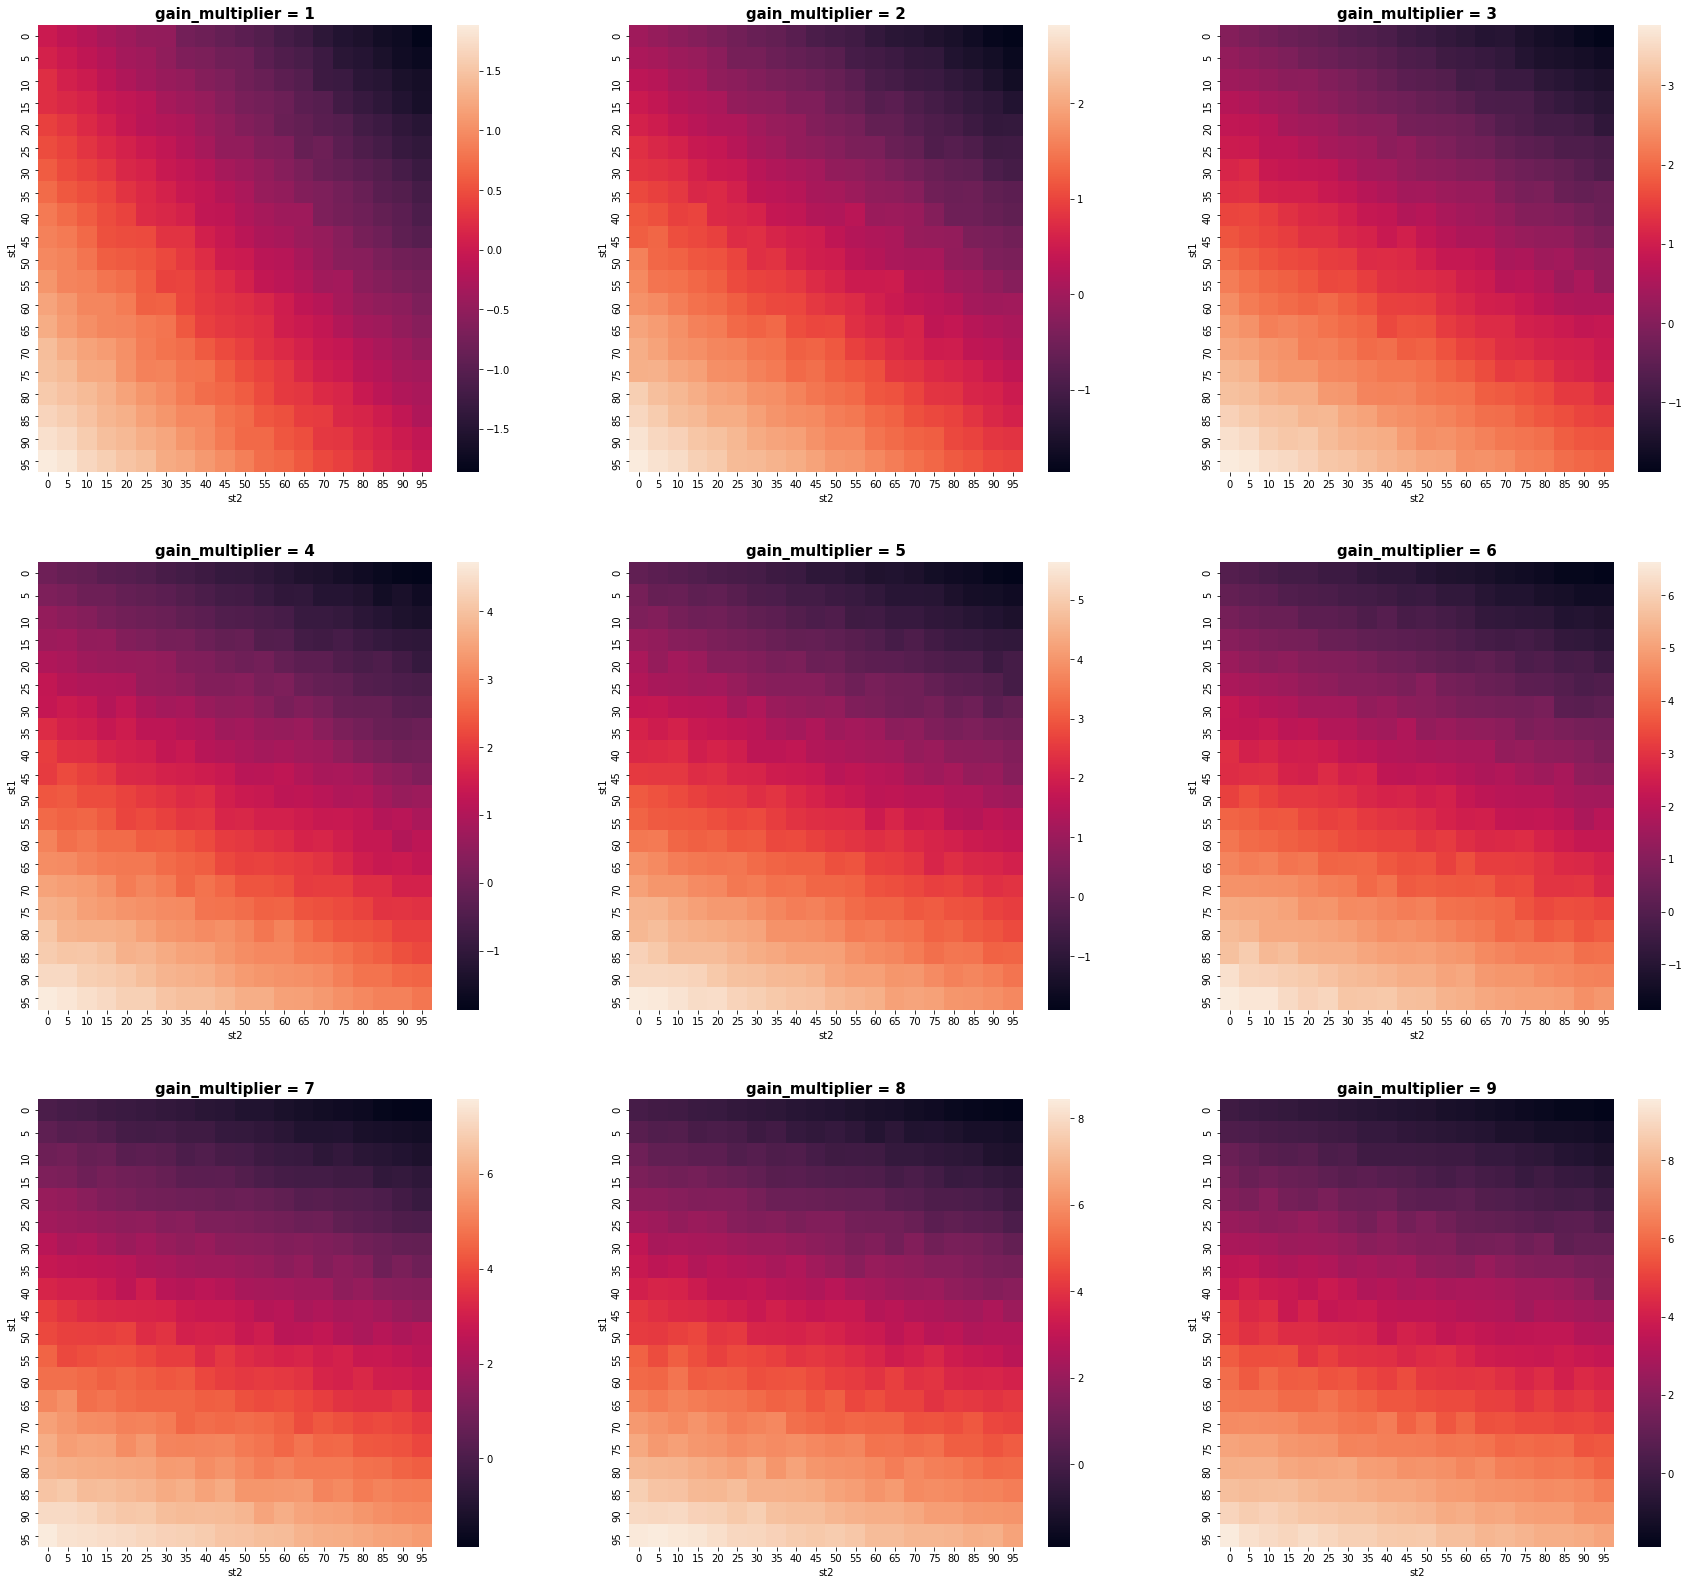

In [41]:
fig = plt.figure(figsize=(30,28))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)


sns.heatmap(df1.pivot("st1", "st2", "dEU"), ax=ax1)
sns.heatmap(df2.pivot("st1", "st2", "dEU"), ax=ax2)
sns.heatmap(df3.pivot("st1", "st2", "dEU"), ax=ax3)
sns.heatmap(df4.pivot("st1", "st2", "dEU"), ax=ax4)
sns.heatmap(df5.pivot("st1", "st2", "dEU"), ax=ax5)
sns.heatmap(df6.pivot("st1", "st2", "dEU"), ax=ax6)
sns.heatmap(df7.pivot("st1", "st2", "dEU"), ax=ax7)
sns.heatmap(df8.pivot("st1", "st2", "dEU"), ax=ax8)
sns.heatmap(df9.pivot("st1", "st2", "dEU"), ax=ax9)

ax1.set_title('gain_multiplier = 1', size= 15, fontweight= "bold")
ax2.set_title('gain_multiplier = 2', size= 15, fontweight= "bold")
ax3.set_title('gain_multiplier = 3', size= 15, fontweight= "bold")
ax4.set_title('gain_multiplier = 4', size= 15, fontweight= "bold")
ax5.set_title('gain_multiplier = 5', size= 15, fontweight= "bold")
ax6.set_title('gain_multiplier = 6', size= 15, fontweight= "bold")
ax7.set_title('gain_multiplier = 7', size= 15, fontweight= "bold")
ax8.set_title('gain_multiplier = 8', size= 15, fontweight= "bold")
ax9.set_title('gain_multiplier = 9', size= 15, fontweight= "bold")

fig.savefig('full-heatmap.png')

## Code Map 2

### Stage 1 w/ n firms

Basic code map includes for n firms:
1. Global variables:
    - total_firms = n firms competing
    - firm_choice
    - success_threshold_t1
    - success_threshold_t2
    - value_lambda = profit scaler
    - market_size = $\frac{1}{n}$
2. Calculate utility at time 1 for each firm
    - utility_t1(firm_choice, value_lambda, success_threshold_t1)
3. Count the number of firms separated by utility
    - zero_firms = U[0]
    - nonzero_firms = total_firms - zero-firms
4. Adjust market_size at time 1 for each firm
    - market_size should contract for zero_firms
    - market_size should expand for nonzero_firms
5. Calculate profit based on utility and market_size at time 1
    - market_profit_t1 = utility_t1 * market_size
6. Calculate utility at time 2 for each firm
7. Count the number of firms separated by utility
8. Adjust market_size at time 2 for each firm
9. Calculate profit based on utiltiy and market_size at time 2
    - market_profit_t2 = utility_t2 * market_size
10. Calculate total market profit


In [22]:
#new global variables to consider
total_firms = 5
market_size = 1 / total_firms

In [23]:
#multi-firm choice game
#calculate zero_firms
def zero_firms_t1(total_firms, firm_choice, gain_multiplier, value_lambda, success_threshold_t1):
    zero_firms = 0
    n = total_firms
    for i in range(n):
        if utility_t1(firm_choice, gain_multiplier, value_lambda, success_threshold_t1) == 0:
            zero_firms += 1
            
    return zero_firms

def zero_firms_t2(total_firms, firm_choice, gain_multiplier, value_lambda, success_threshold_t2):
    zero_firms = 0
    n = total_firms
    for i in range(n):
        if utility_t2(firm_choice, gain_multiplier, value_lambda, success_threshold_t2) == 0:
            zero_firms += 1
    
    return zero_firms

#adjust market size for each firm
def market_size_t1(market_size, total_firms, firm_choice, gain_multiplier, value_lambda, succes_threshold_t1):
    pass

def market_size_t2(market_size, total_firms, firm_choice, gain_multiplier, value_lambda, succes_threshold_t2):
    pass

#calculate market-based total utility
def market_total_utility(market_size, total_firms, firm_choice, gain_multiplier, value_lambda, success_threshold_t1, success_threshold_t2):
    pass